# Pré-Processamento dos Datasets

Precisamos formatar os datasets para caber corretamente no nosso banco de dados

In [39]:
import pandas as pd

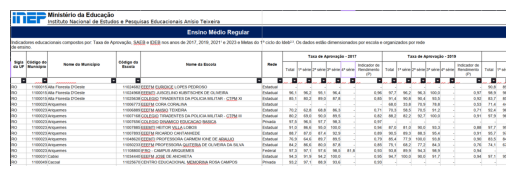

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('../images/cabecalhos.png')
plt.imshow(img)
plt.axis('off')  # Oculta os eixos
plt.title('Colunas de cabeçalho originalmente', fontsize=12)
plt.show()

img = mpimg.imread('../images/rodape.png')
plt.imshow(img)
plt.axis('off')  # Oculta os eixos
plt.title('Colunas de rodape originalmente', fontsize=12)
plt.show()


As colunas de cabeçalho e de rodapé do dataset INSE_2021_escolas.xlsx foram retiradas manualmente no Excel, já que o pandas não consegue reconhecer as reais colunas. Nessa etapa, eles já foram convertidos para `csv` e salvos em `datasets/desempenho_escolar.csv` e `datasets/indicadores_socio_economicos.csv`.

In [40]:
df_desempenho_escolar = pd.read_csv('../datasets/originals/desempenho_escolar.csv')
df_inse = pd.read_csv('../datasets/originals/indicadores_socio_economicos.csv')

/tmp/ipykernel_21776/2984961294.py:1: DtypeWarning: Columns (48) have mixed types. Specify dtype option on import or set low_memory=False.
  df_desempenho_escolar = pd.read_csv('../datasets/originals/desempenho_escolar.csv')


Um problema do dataset é que há escolas no dataset de Desempenho Escolar que não estão no dataset de Indicadores Socio Economicos. Para isso, vamos filtrar os valores de ambas as tabelas considerando as escolas que existem em ambos.

In [41]:
ids_validos = df_inse['ID_ESCOLA'].unique()
df_desempenho_escolar_filtrado = df_desempenho_escolar[df_desempenho_escolar['ID_ESCOLA'].isin(ids_validos)]

print('---------- Filtrando Desempenho Escolar ----------')
print('Numero escolas no Dataset Desempenho Escolar:                ', len(df_desempenho_escolar))
print('Numero escolas no Dataset Desempenho Escolar após filtrar:   ', len(df_desempenho_escolar_filtrado))
df_desempenho_escolar = df_desempenho_escolar_filtrado

ids_validos = df_desempenho_escolar['ID_ESCOLA'].unique()
df_inse_filtrado = df_inse[df_inse['ID_ESCOLA'].isin(ids_validos)]

print('\n---------- Filtrando INSE ----------')
print('Numero escolas no Dataset INSE:                ', len(df_inse))
print('Numero escolas no Dataset INSE após filtrar:   ', len(df_inse_filtrado))
df_inse = df_inse_filtrado

---------- Filtrando Desempenho Escolar ----------
Numero escolas no Dataset Desempenho Escolar:                 21578
Numero escolas no Dataset Desempenho Escolar após filtrar:    19278

---------- Filtrando INSE ----------
Numero escolas no Dataset INSE:                 69820
Numero escolas no Dataset INSE após filtrar:    19278


Agora, repare que os valores do dataset de Desempenho Escolar denotam valores de ponto flutuante com `vírgula` em vez de `ponto`. O pandas não lê isso corretamente, então vamos substituir. Como não há nenhum outro valor que contenha vírgulas, é possível aplicar um replace em todos os os valores lidos como String atualmente.

In [42]:
df_desempenho_escolar = df_desempenho_escolar.map(lambda x: float(str(x).replace(',', '.')) if isinstance(x, str) and ',' in x else x)

Agora os datasets estão corretamente formatados e podem ser facilmente lidos para a inserção dos dados no banco.

In [43]:
df_desempenho_escolar.to_csv('../datasets/desempenho_escolar.csv', index=False)
df_inse.to_csv('../datasets/indicadores_socio_economicos.csv', index=False)# 